In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xml.dom.minidom import parse, parseString
from bs4 import BeautifulSoup
import ResultsClass



# Helpful functions


In [2]:
def get_sec(time_str):
    n = time_str.count(":")
    if (n > 2):
        print("Error handling the timestring")
    if (n == 2):
        h, m, s = time_str.split(':')
        return int(h) * 3600 + int(m) * 60 + float(s)
    if (n == 1):
        m, s = time_str.split(':')
        return int(m) * 60 + float(s)
    

In [3]:
# Read in the XML file
from tokenize import Number


filePath = "RaceResults.xml"
doc = parse(filePath)

file = open(filePath, "r")
contents = file.read()

# Analyse XML
soup = BeautifulSoup(contents, 'xml')
content = soup.find_all('Result')

Results = []

for i in range(len(content)):
    r = content[i]
    TeamName = (r.find("Name").getText())
    CarName = (r.find("Brand").getText())
    CarClass = (r.find("Class").getText())
    FastestSpeedKMH = (r.find("SpeedTrap_1_BestSpeedKmh").getText())
    FastestLap = (r.find("FastestLap").getText())
    NumberOfLaps = (r.find("Laps").getText())
    NumberOfPits = (r.find("PitStops").getText())

    #Error handling if no laps or no pitstops
    if NumberOfLaps == "":
        NumberOfLaps = 0
    else:
        NumberOfLaps = int(NumberOfLaps)
    if NumberOfPits == "":
        NumberOfPits = 0
    else:
        NumberOfPits = int(NumberOfPits)
        
    LapTimes = []
    for j in range(NumberOfLaps):
        j += 1
        LapTimes.append(r.find("Lap" + str(j)).getText())

    PitStops = []
    for k in range(NumberOfPits-1):
        k += 1
        PitStops.append(r.find("PitStop" + str(k)).getText())

    StintLength = []
    for l in range(NumberOfPits):
        l += 1
        StintLength.append(r.find("Stint" + str(l)).getText())
        
    Results.append(ResultsClass.ResultsClass(TeamName, CarName, CarClass, FastestSpeedKMH, FastestLap, NumberOfLaps, NumberOfPits, LapTimes, PitStops, StintLength))


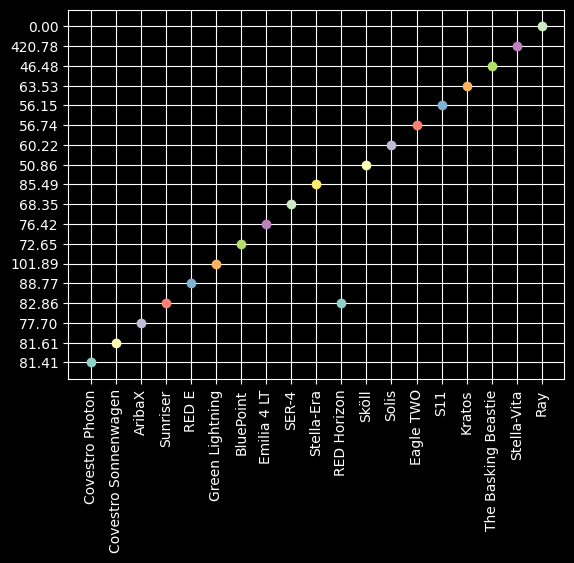

In [4]:
# Visualize the data
plt.figure(1)
for i in Results:
    plt.plot(i.Carname,(i.FastestSpeedKMH), 'o', label=i.Teamname)
    plt.xticks(rotation=90)
    plt.grid('minor')
#plt.legend()
plt.show()

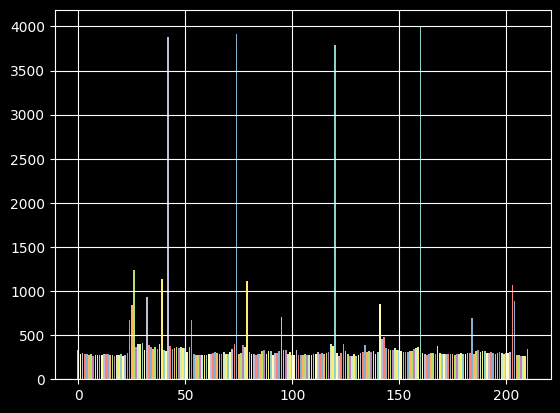

In [5]:
# Visualize the data of SER-4
plt.figure(2)
r = Results[8]

for i in range(len(r.Laptimes)):
    #print(get_sec(r.Laptimes[i]))
    plt.bar(i, get_sec(r.Laptimes[i]))
    plt.grid("minor")

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

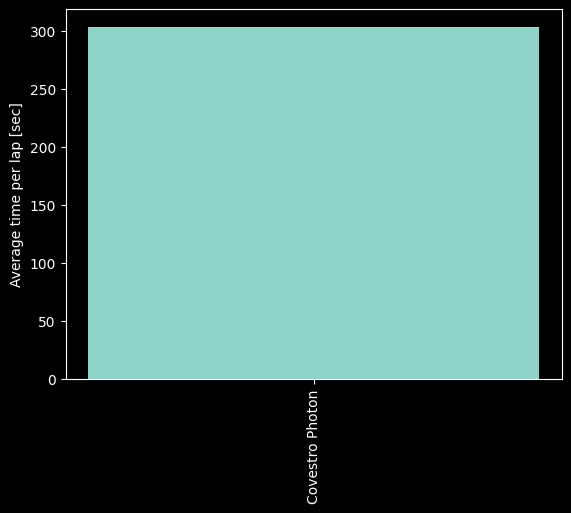

In [11]:
j = 0
plt.figure(3)
for i in Results:
    i.CalcAverageLapTime()
    plt.bar(i.Carname, i.averageLapTime)
    plt.xticks(rotation=90)
    plt.ylabel("Average time per lap [sec]")
    #plt.hist(i.Carname, bins=5, i.Laptimes)
    counts, bins = np.histogram(get_sec(i.Laptimes))
    plt.hist(bins[:-1], bins, weights=counts)

    plt.xticks(rotation=90)
plt.show(3)